# 1 This code imports necessary libraries

In [1]:
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import sqlite3

# 2 This code creates: 
## 2.1 a SQL database connection 
## 2.2 a Python object, via the pandas library, which reads the CSV, then converts it to a SQL database.

In [2]:
conn = sqlite3.connect('CPIAUCSL.db')
cp_index = pd.read_csv('CPIAUCSL.csv')
cp_index.to_sql('cp_index', conn, if_exists = "replace")

# 3 The next line of code runs our index, printing out our database in its raw form
## The data gives the Consumer Price Index (CPI), an index of the cost of consumer goods in the U.S., for all months from January 1947 to June 2019. The left column gives the date in year-month-day format. The right gives the CPI number.

In [3]:
cp_index

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
5,1947-06-01,22.080
6,1947-07-01,22.230
7,1947-08-01,22.400
8,1947-09-01,22.840
9,1947-10-01,22.910


## 3.1. The next line renames the columns in the database to increase readability, then prints out the result

In [4]:
cp_index.rename(columns={'DATE': 'Date', 'CPIAUCSL':'Consumer Price Index'}, inplace=True)
cp_index

,Date,Consumer Price Index
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
5,1947-06-01,22.080
6,1947-07-01,22.230
7,1947-08-01,22.400
8,1947-09-01,22.840
9,1947-10-01,22.910


# 4 Let's do some SQL queries on the database

## 4.1. First, let's query the data to find out what months had the highest CPI

In [5]:
pd.read_sql_query("""
    SELECT DATE as 'Date', CPIAUCSL AS 'CPI' FROM cp_index
    ORDER BY CPI DESC
    LIMIT 5;
""", conn)

,Date,CPI
0,2019-06-01,255.305
1,2019-05-01,255.155
2,2019-04-01,254.958
3,2019-03-01,254.148
4,2019-02-01,253.113


## 4.2 Yikes! It's the five most recent months! Which years had the lowest CPI?

In [6]:
pd.read_sql_query("""
    SELECT DATE as 'Date', CPIAUCSL AS 'CPI' FROM cp_index
    ORDER BY CPI ASC
    LIMIT 5;
""", conn)

,Date,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-05-01,21.95
3,1947-03-01,22.00
4,1947-04-01,22.00


## 4.3 The lowest CPIs recorded were from the first five months for which we have data, though May 1947's number is lower than March and April's

# 5 The next lines of code show provide visualizations for various analyses of our data

## 5.1 First, let's print a simple line graph of the CPI 

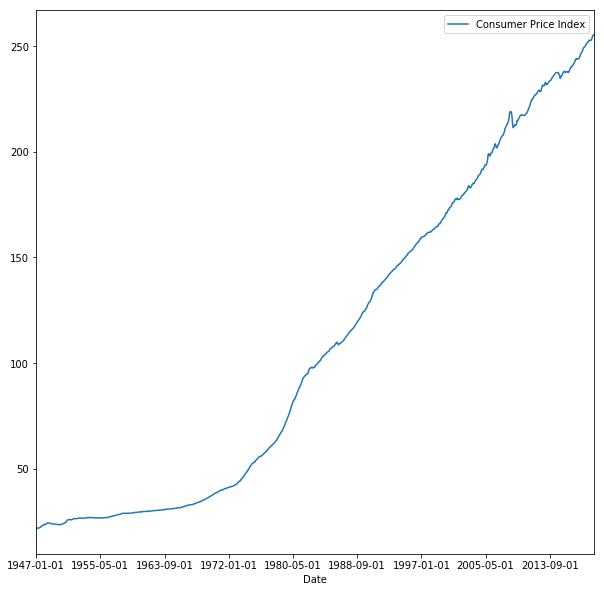

In [7]:
cp_index.plot('Date', 'Consumer Price Index', figsize=(10, 10))

## 5.2 Let's get a better look at the largest dip. We'll zoom in on the years from 2006 to 2010

In [8]:
second_graph = pd.read_sql_query("""
    SELECT DATE as 'Date', CPIAUCSL AS 'CPI' FROM cp_index
    WHERE DATE > "2005-12-01" AND DATE < "2010-01-01"
""", conn)

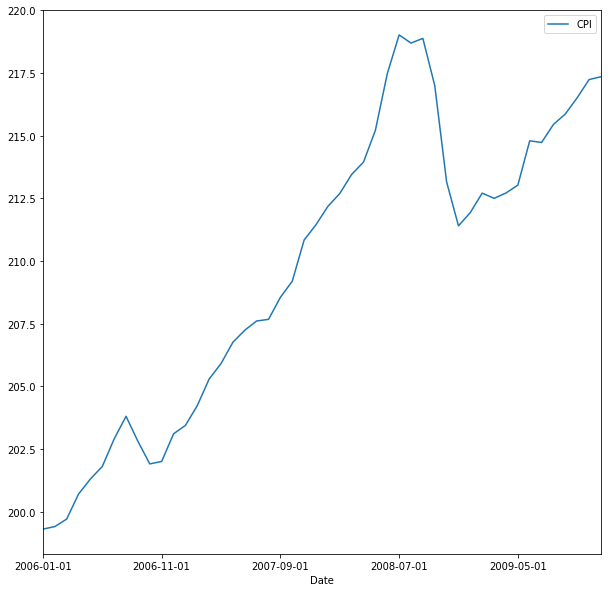

In [9]:
second_graph.plot('Date', 'CPI', figsize = (10, 10))

## 5.3 Let's get even closer, and zoom in on 2008-2009

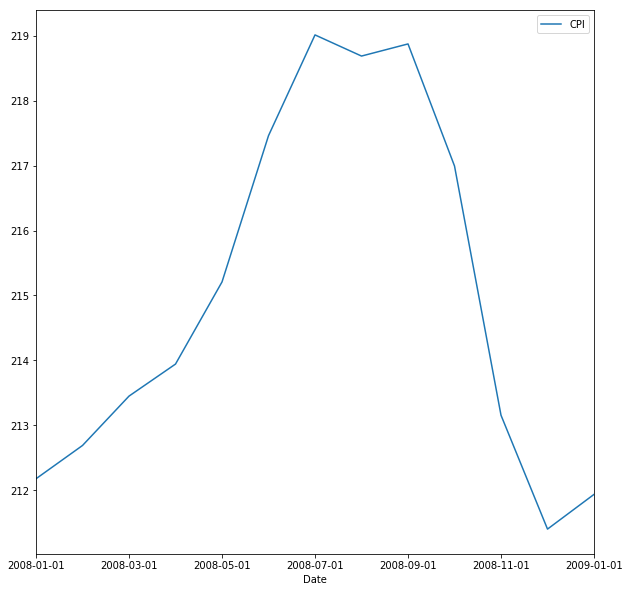

In [10]:
closeup_graph = pd.read_sql_query("""
    SELECT DATE as 'Date', CPIAUCSL AS 'CPI' FROM cp_index
    WHERE DATE > "2007-12-01" AND DATE < "2009-02-01"
""", conn)
closeup_graph.plot("Date", "CPI", figsize = (10, 10))

### 5.3.1 Let's find out what the most expensive month was in the above graph

In [11]:
bubble_max = pd.read_sql_query("""
    SELECT Date as Date, max(CPIAUCSL) as 'CPI' FROM cp_index
    WHERE DATE > "2005-12-01" AND DATE < "2010-01-01"
""", conn)
bubble_max

,Date,CPI
0,2008-07-01,219.016


## 5.3.2 So during the period of the 2008 housing collapse, it looks like consumer prices peaked in July of 2008

## 5.4 Let's get to work. Here, I perform SQL queries to find out the average, min, and max CPI for each year.

In [12]:
analysis = pd.read_sql_query("""
    SELECT strftime('%Y', DATE) as 'Year', MIN(CPIAUCSL) as 'Min CPI', AVG(CPIAUCSL) AS 'Average CPI', MAX(CPIAUCSL) AS 'Max CPI' FROM cp_index
    GROUP BY Year
""", conn)
analysis

,Year,Min CPI,Average CPI,Max CPI
0,1947,21.480,22.331667,23.410
1,1948,23.500,24.045000,24.430
2,1949,23.610,23.809167,24.010
3,1950,23.510,24.062500,24.980
4,1951,25.380,25.973333,26.470
5,1952,26.390,26.566667,26.710
6,1953,26.590,26.768333,26.950
7,1954,26.720,26.865000,26.990
8,1955,26.710,26.795833,26.880
9,1956,26.830,27.190833,27.630


### 5.4.1 Here's a simple depiction of all that information in a line graph

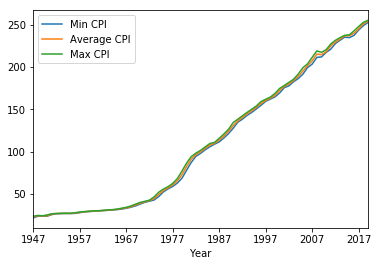

In [13]:
analysis.plot('Year')

## 5.5 Lastly, let's find out how much variation we find in each calendar year. We'll get both the absolute variation between minimum and maximum values and the percentage increase the maximum value represents over the minimum value

In [14]:
pd.set_option('display.max_rows', 75)
analysis2 = pd.read_sql_query("""
    SELECT strftime('%Y', DATE) as 'Year', Max(CPIAUCSL) - Min(CPIAUCSL) AS 'Min to Max', Max(CPIAUCSL)/Min(CPIAUCSL)* 100 - 100 AS '% increase, max over min' FROM cp_index
    GROUP BY Year
""", conn)
analysis2

,Year,Min to Max,"% increase, max over min"
0,1947,1.930,8.985102
1,1948,0.930,3.957447
2,1949,0.400,1.694197
3,1950,1.470,6.252658
4,1951,1.090,4.294720
5,1952,0.320,1.212581
6,1953,0.360,1.353892
7,1954,0.270,1.010479
8,1955,0.170,0.636466
9,1956,0.800,2.981737


### 5.5.1 Now suppose we want to know whether the absolute distance between minimum and maximum values in a given calendar year roughly correlates with the relative increase of the maximum on the minimum; or, whether, instead, there are some cases where one is high and the other is low. Let's run one last line graph 

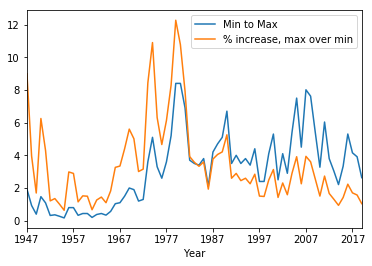

In [15]:
analysis2.plot('Year')

### 5.5.2 As the above shows, the two tend to rise and fall together: however, we can see that if we're looking in terms of percentages, then the largest change by far occurred in the later 70s. However, If we're looking in terms of absolute numbers, the price changes of the late 70s were roughly matched by those of the late 2000s.